In [2]:
# Libraries required for this tutorial...

from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import os
import xarray as xr
import glob

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

from matplotlib.ticker import MultipleLocator, FormatStrFormatter  # ticker spacing
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import metpy
import metpy.calc as mpcalc
from metpy.plots import colortables, Hodograph, SkewT
from metpy.units import units

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
path_staging = "/data/project/ARM_Summer_School_2024_Data/lasso_tutorial/cacti/lasso-cacti"  # path on Jupyter
filename = f"{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_met_2019012900eda09d3_base_M1.m1.20190129.183000.nc"
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (Time: 1, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 8B 2019-01-29T18:30:00
    XLONG                 (south_north, west_east) float32 3MB ...
    XLAT                  (south_north, west_east) float32 3MB ...
    XTIME                 (Time) float32 4B ...
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/52)
    ITIMESTEP             (Time) int32 4B ...
    MUTOT                 (Time, south_north, west_east) float32 3MB ...
    HGT                   (Time, south_north, west_east) float32 3MB ...
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 387MB ...
    ...                    ...
    MULFC                 (Time, south_north, west_east) float32 3MB ...
    MULNB                 (Time, south_north, west_east) float32 3MB ...
    MULPL                 (Time, south_north, west_east) float32 3MB ...
    MUCAPE                (Time, south_north, west_east) float32 3MB ...
    MUCIN                 (Time, south_north, west_east) float32 3MB ...
    REFL_10CM_MAX         (Time, south_north, west_east) float32 3MB ...
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus28...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

In [9]:
file_list = sorted(glob.glob(f'{path_staging}/20190129/eda09/base/les/subset_d3/corlasso_met_*'))

In [10]:
#file_list

In [11]:
ds = xr.open_dataset(file_list[20])
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (Time: 1, south_north: 865, west_east: 750,
                           bottom_top: 149)
Coordinates:
  * Time                  (Time) datetime64[ns] 8B 2019-01-29T11:00:00
    XLONG                 (south_north, west_east) float32 3MB ...
    XLAT                  (south_north, west_east) float32 3MB ...
    XTIME                 (Time) float32 4B ...
Dimensions without coordinates: south_north, west_east, bottom_top
Data variables: (12/52)
    ITIMESTEP             (Time) int32 4B ...
    MUTOT                 (Time, south_north, west_east) float32 3MB ...
    HGT                   (Time, south_north, west_east) float32 3MB ...
    HAMSL                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    P_HYD                 (Time, bottom_top, south_north, west_east) float32 387MB ...
    PRESSURE              (Time, bottom_top, south_north, west_east) float32 387MB ...
    ...                    ...
    MULFC                 (Time, south_north, west_east) float32 3MB ...
    MULNB                 (Time, south_north, west_east) float32 3MB ...
    MULPL                 (Time, south_north, west_east) float32 3MB ...
    MUCAPE                (Time, south_north, west_east) float32 3MB ...
    MUCIN                 (Time, south_north, west_east) float32 3MB ...
    REFL_10CM_MAX         (Time, south_north, west_east) float32 3MB ...
Attributes: (12/39)
    DX:                          500.0
    DY:                          500.0
    SIMULATION_START_DATE:       2019-01-29_06:00:00
    WEST-EAST_GRID_DIMENSION:    751
    SOUTH-NORTH_GRID_DIMENSION:  866
    BOTTOM-TOP_GRID_DIMENSION:   150
    ...                          ...
    doi_isPartOf_lasso-cacti:    https://doi.org/10.5439/1905789
    doi_isDocumentedBy:          https://doi.org/10.2172/1905845
    doi_thisFileType:            https://doi.org/10.5439/1905819
    history:                     processed by user d3m088 on machine cirrus89...
    filename_user:               corlasso_met_2019012900eda09d3_base_M1.m1.20...
    filename_storage:            corlassomet2019012900eda09d3baseM1.m1.201901...

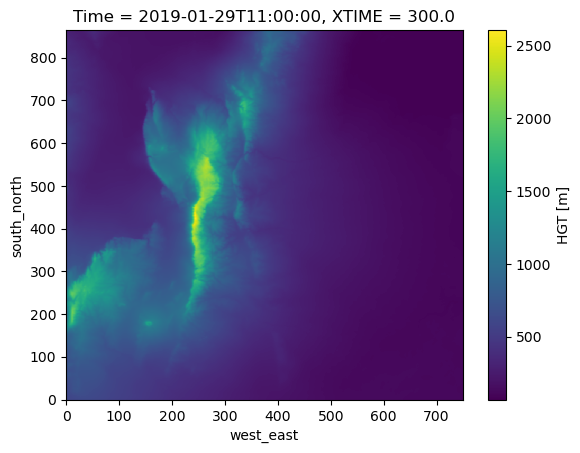

In [13]:
ds.HGT.plot()

TypeError: Input z must be 2D, not 3D

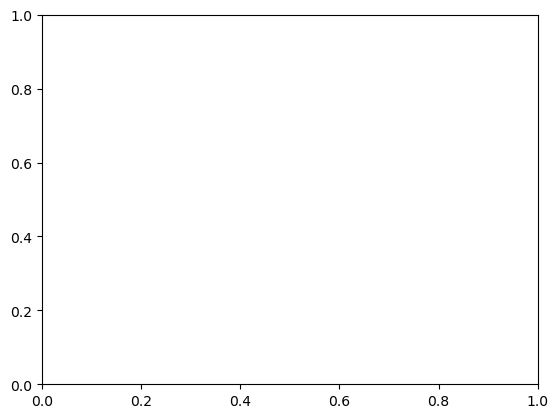

In [21]:
plt.contourf([ds.XLONG, ds.XLAT], ds.HGT[0,:,:])

In [18]:
ds.HGT[0,:,:].shape

(865, 750)

In [19]:
ds.XLONG.shape

(865, 750)